In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

[轉換.svg 路徑網站](https://shinao.github.io/PathToPoints/)

In [20]:
x = []
y = []
with open("marijuana_svg.txt", 'r') as file: # 讀取path 資料
    for line in file.readlines():
        sx, sy = line[:-1].split(',')
        x.append(float(sx))
        y.append(float(sy))
data = np.array(x) + (np.array(y)*1j)
# 原始資料轉換
data /= 11000
data -= 0.05
data -= 0.12j

[0, 1, 0, 1]

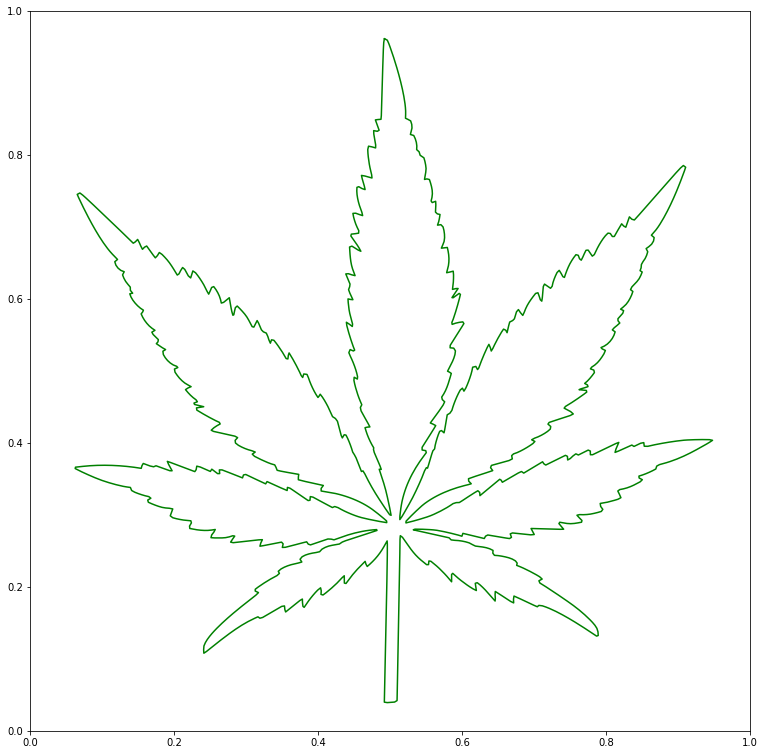

In [21]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes([0, 0, 1, 1])
ax.plot(data.real, data.imag, '-g')
ax.axis('equal')
ax.axis([0, 1, 0, 1])

In [22]:
fft = np.fft.fft(data) # fourier 轉換
sort_ind = np.argsort(np.abs(fft))[::-1] # 排列大小(振幅大小)
fft = fft * np.eye(fft.size) # 乘以單位矩陣 分離每個轉換 
ifft = np.fft.ifft(fft[sort_ind]) # 按照大小排列轉換結果
ifft.shape

(1835, 1835)

In [12]:
def pp(start, end ,step):
    global ar
    for i in range(start, end ,step):
        ar += ifft[i:i+step].sum(0)
        fig = plt.figure(figsize=(10, 10));
        ax = plt.axes([0, 0, 1, 1])
        plt.fill(ar.real, ar.imag, fill=False, c='k', lw=1.5)
        ax.axis([0, 1, 0, 1])
        plt.box()
        plt.xticks([])
        plt.yticks([])
        fig.savefig(f'cat{i}.png')

In [13]:
ar = 0
# pp(0, 30, 1)
# pp(30, 150, 10)

In [14]:
n = 100 # 取前幾大重要向量
ifft = ifft[0:n]
siz = ifft.shape[1]
ifft.shape

(100, 890)

In [15]:
r = np.abs(ifft[:,0]) # 圓弧半徑
arr = np.zeros_like(ifft)
arr[0] = ifft[0] # 累積向量
for i in range(1, n):
    arr[i] = ifft[0:i+1].sum(0)

([], <a list of 0 Text yticklabel objects>)

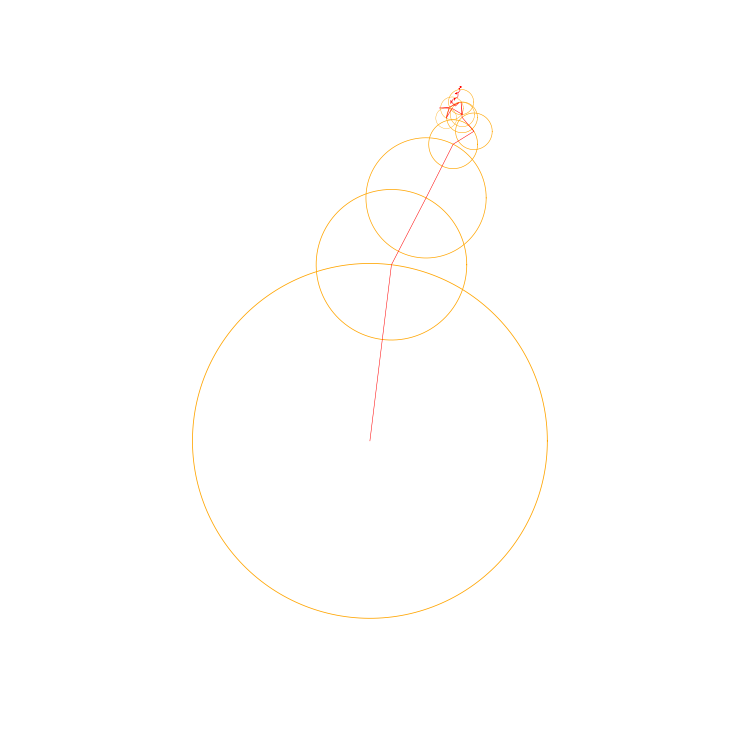

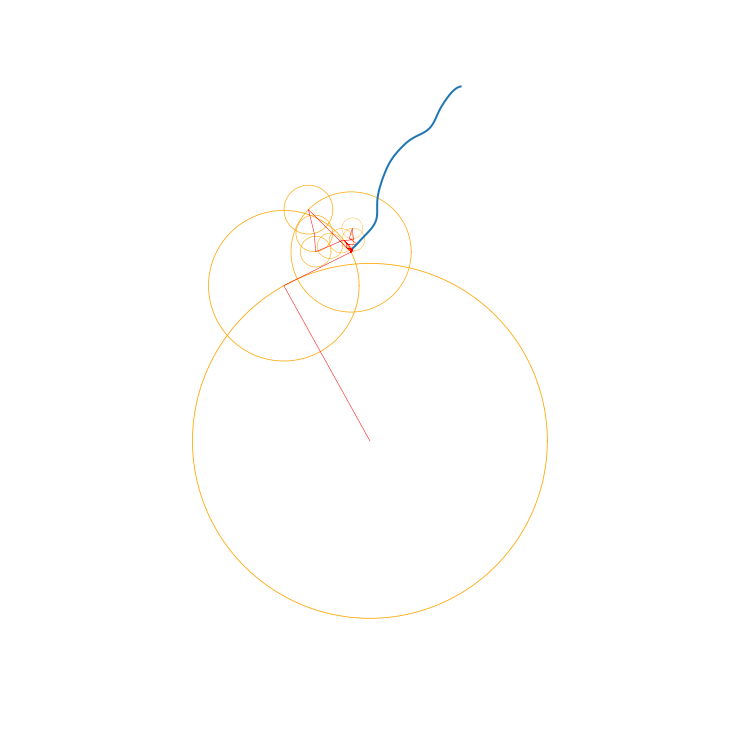

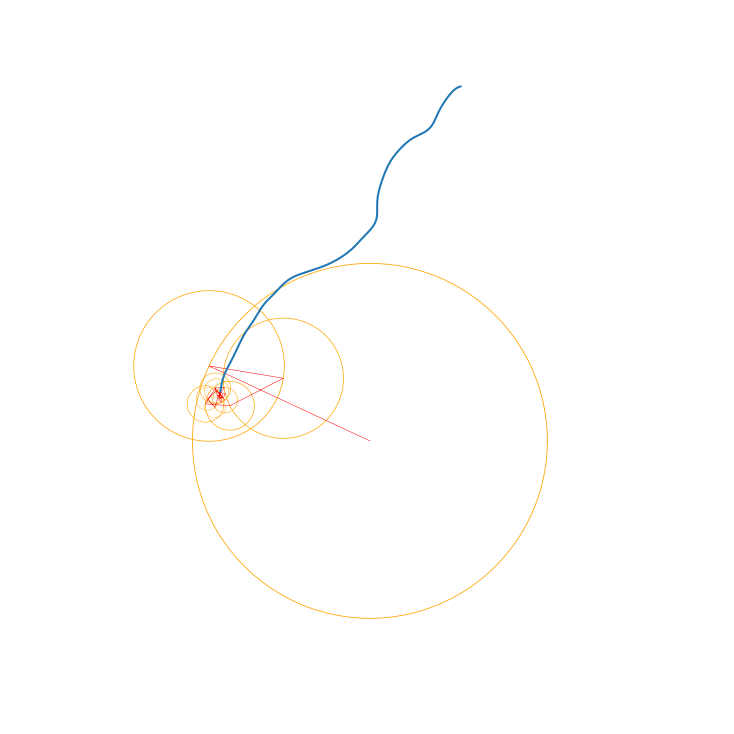

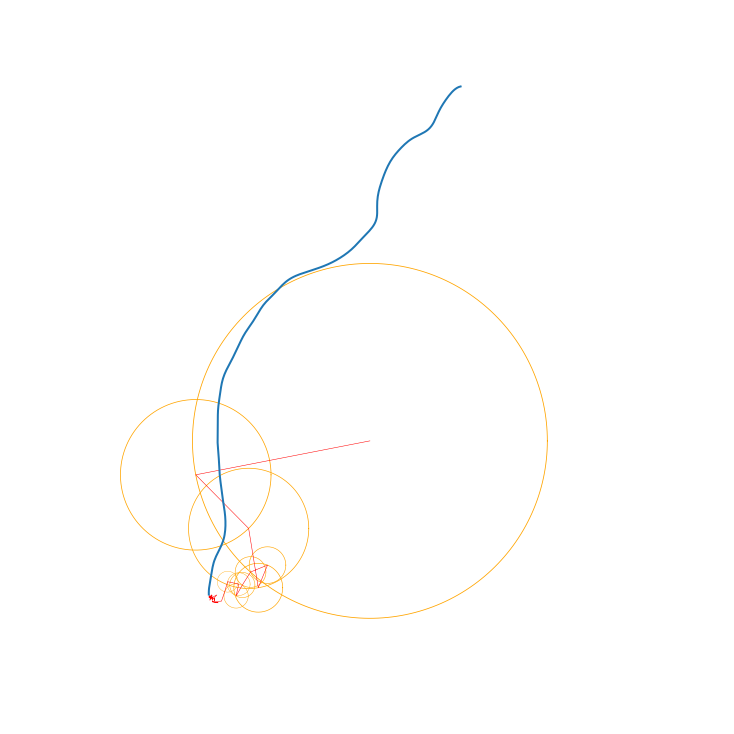

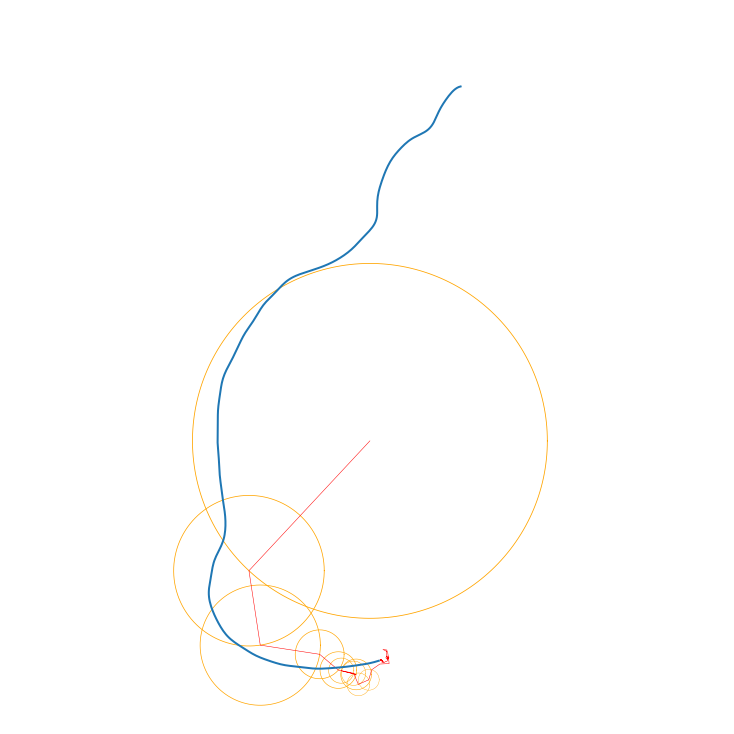

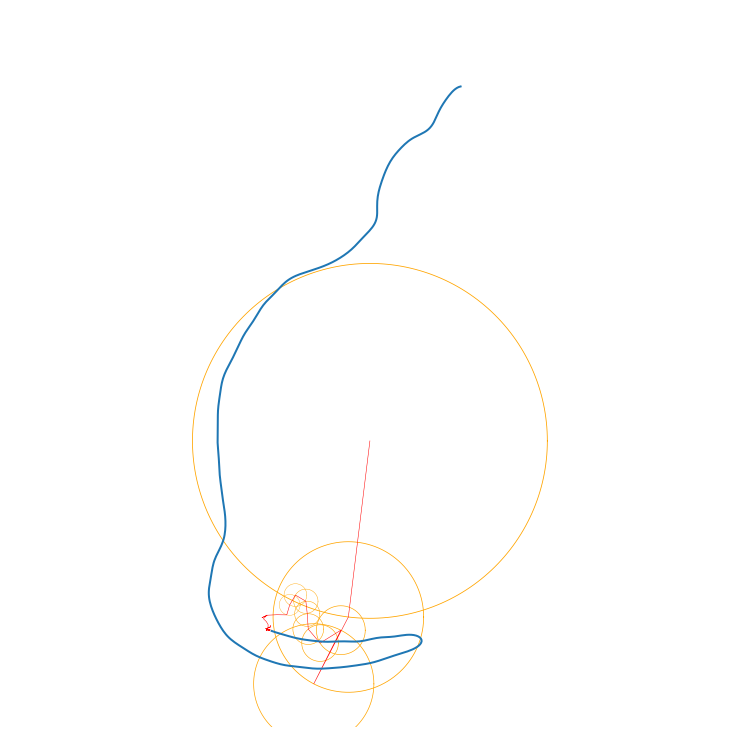

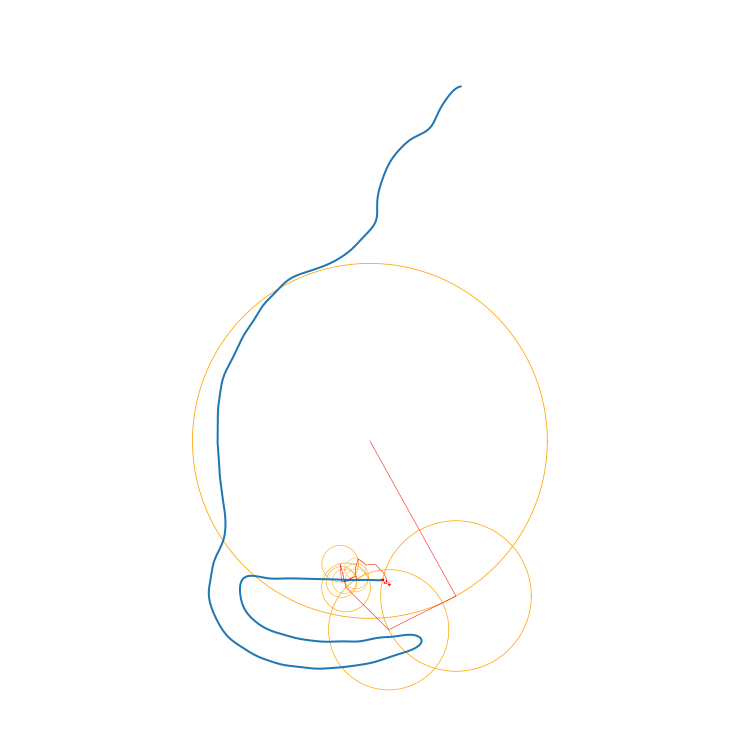

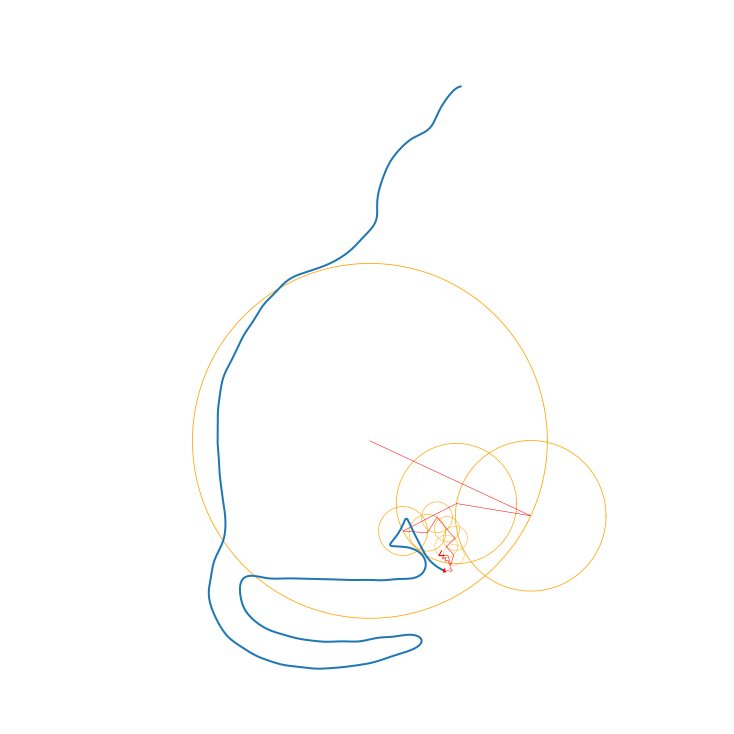

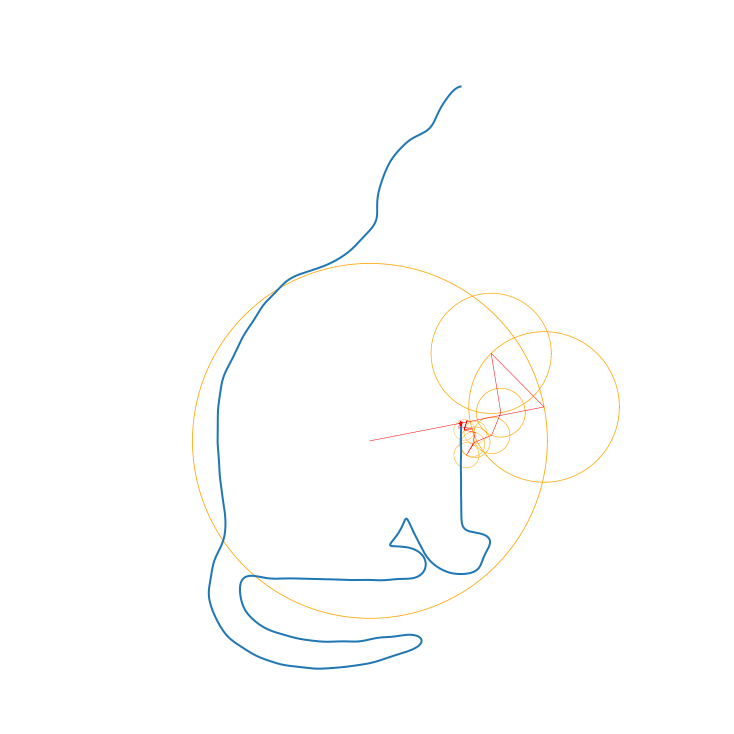

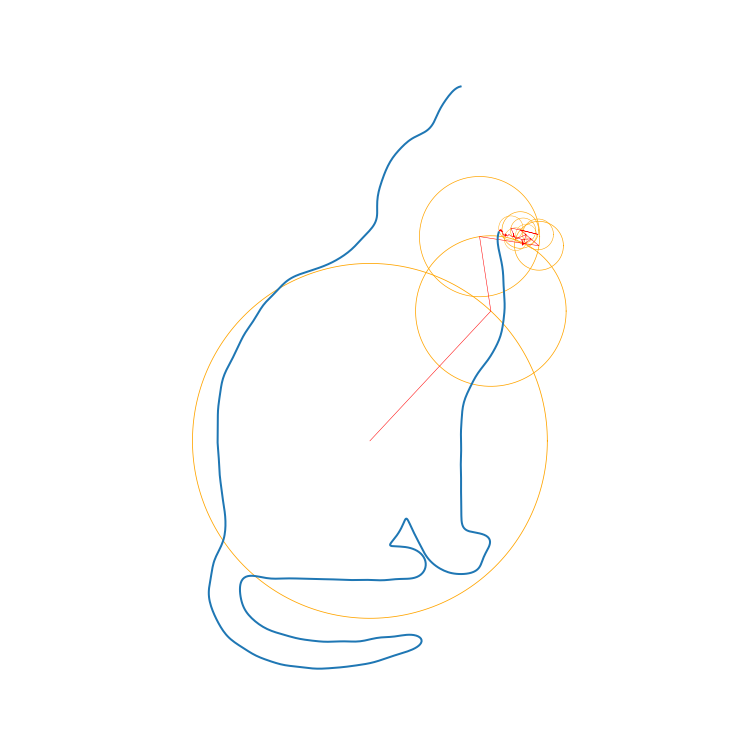

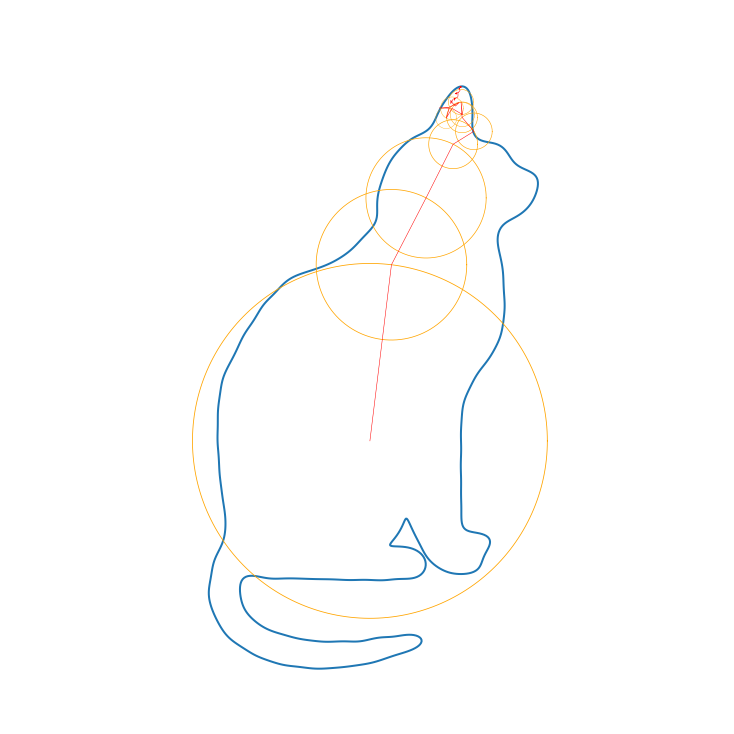

In [16]:
t = siz//5
ar = np.linspace(0, 2 * np.pi, 240) # 畫圓
for i in range(siz//t):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes([0, 0, 1, 1])
    for j in range(10): # 畫前10大的園
        aar = r[j+1] * np.exp(1j * ar) + arr[j, i*t] # 制圓
        ax.plot(aar.real, aar.imag, c='orange', lw=0.8-(0.05*j)) # 畫圓
    ax.plot(arr[:, i*t].real, arr[:, i*t].imag, c='r', lw=0.5) # 畫手臂 
    ax.plot(arr[n-1, 0:i*t].real, arr[n-1, 0:i*t].imag, c='#1f77b4', lw=2)# 畫延遲路徑
    ax.axis([0, 1, 0, 1])
    plt.box()
    plt.xticks([])
    plt.yticks([])
#     fig.savefig(f'tww{i}.png')
# 畫完整路徑
fig = plt.figure(figsize=(10, 10))
ax = plt.axes([0, 0, 1, 1])
for j in range(10):
    aar = r[j+1] * np.exp(1j * ar) + arr[j, 0]
    ax.plot(aar.real, aar.imag, c='orange', lw=0.8-(0.05*j))
ax.plot(arr[:, 0].real, arr[:, 0].imag, 'r', lw=0.5)
ax.fill(arr[-1].real, arr[-1].imag, fc='w',ec='#1f77b4', lw=2) # 畫完整路徑
ax.axis([0, 1, 0, 1])
plt.box()
plt.xticks([])
plt.yticks([])
# fig.savefig(f'tww{siz//t}.png')

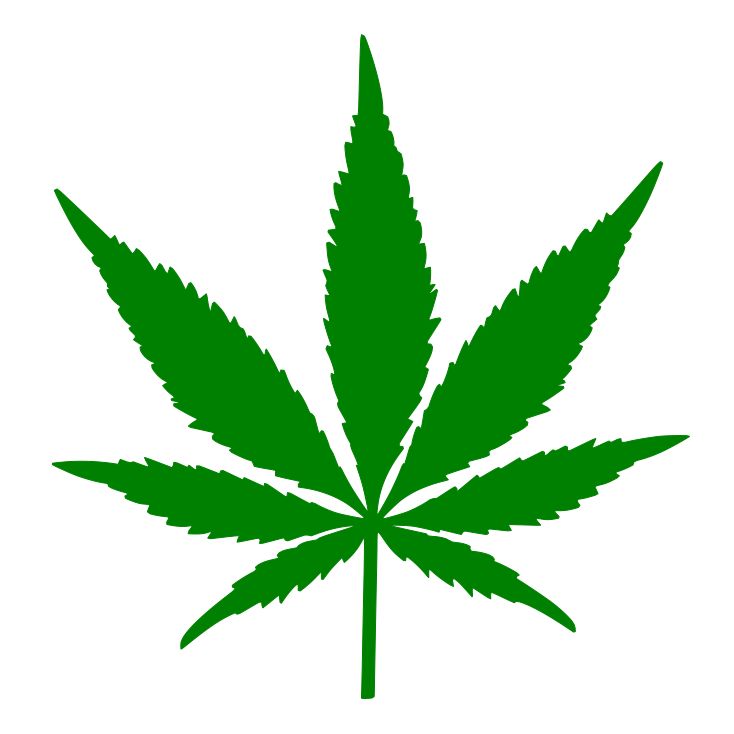

In [28]:
colors = matplotlib.cm.gist_rainbow(np.linspace(0, 1, 8))

for i in range(1):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes([0, 0, 1, 1])
    plt.fill(data.real, data.imag, c='g')# c=colors[i%7])
    ax.axis([0, 1, 0, 1])
    plt.box()
    plt.xticks([])
    plt.yticks([])
    fig.savefig(f'o{+i}.png')#, facecolor=colors[(i+4)%7])